In [3]:
import pandas as pd
from datetime import timedelta
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import lyricsgenius
from fuzzywuzzy import fuzz

In [97]:
kpop_world_sales = pd.read_csv('Kpop on BB - World Digital Sales.csv')

kpop_world_sales.insert(3, 'original_lyrics', ['' for i in range(len(kpop_world_sales))])
kpop_world_sales.insert(4, 'translated_lyrics', ['' for i in range(len(kpop_world_sales))])

kpop_world_sales.rename(columns={'Chart date[169]': 'chart_date', 
                            'Artist': 'artist',
                            'Song/Album Title': 'song_title',
                            'Peak position': 'peak_position',
                            'Consecutive\nentry weeks': 'entry_weeks'}, inplace=True)
                            
##standardize and process chart data

#remove wiki citations, standardize whitespace, remove quotation marks
#regex patterns and replacement strings
regex_pats = [[r"(\[\d+\])", ""], [r"(\s)", " "], [r"(\")", ""]]
for pat in regex_pats:
    kpop_world_sales["artist"] = kpop_world_sales["artist"].str.replace(pat[0], pat[1])
    kpop_world_sales["song_title"] = kpop_world_sales["song_title"].str.replace(pat[0], pat[1])
    kpop_world_sales["peak_position"] = kpop_world_sales["peak_position"].str.replace(pat[0], pat[1])

#pull out just main artist, remove features (for genius search)
kpop_world_sales['main_artist'] = kpop_world_sales["artist"].str.replace(r"(feat.*)", '')
kpop_world_sales['main_artist'] = kpop_world_sales["main_artist"].str.replace(r"(and .*)", '')
kpop_world_sales['main_artist'] = kpop_world_sales["main_artist"].str.strip()

#remove parentheticals from title
kpop_world_sales['search_title'] = kpop_world_sales['song_title'].str.replace(r"(\(.*\))", "")

#standardize peak positions (remove parentheticals) + remove trailing whitespace + remove all non-digits
kpop_world_sales["peak_position"] = kpop_world_sales["peak_position"].str.replace(r"(\(.*\))", "")
kpop_world_sales["peak_position"] = kpop_world_sales["peak_position"].str.strip()
kpop_world_sales["peak_position"] = kpop_world_sales["peak_position"].str.replace(r"[a-z]", "")

In [98]:
##set up genius w/ api key -- DELETE LATER
genius = lyricsgenius.Genius('')

In [99]:
genius.search_song('BTS' + ' - ' + 'DNA' + ' (English Translation)', 'Genius English Translations')

Searching for "BTS - DNA (English Translation)" by Genius English Translations...
Done.


('BTS - DNA (English Translation)', 'Genius English Translations')

In [100]:
##iterate through all songs to scrape original lyrics
for i, r in kpop_world_sales.iterrows():
    this_song = genius.search_song(r['search_title'], r['main_artist'])

    #continue if it returns a result
    if this_song:
        #partial ratio threshold to prevent mismatches
        title_similarity = fuzz.partial_ratio(r['search_title'].lower(), this_song.title.lower())
        artist_similarity = fuzz.partial_ratio(r['main_artist'].lower(), this_song.artist.lower())
        

        #if similarity is above threshold, store lyrics + url
        if title_similarity > 60 and artist_similarity > 60:
            print(r['search_title'], r['main_artist'], " | ", this_song.title, this_song.artist)
            this_lyrics = this_song.lyrics
            kpop_world_sales.at[i, 'original_lyrics'] = this_lyrics

Searching for "No Other" by Super Junior...
Done.
No Other Super Junior  |  너 같은 사람 또 없어 (No Other) SUPER JUNIOR
Searching for "Wedding Dress" by Taeyang...
Done.
Wedding Dress Taeyang  |  Wedding Dress TAEYANG (태양)
Searching for "I Need A Girl" by Taeyang...
Done.
I Need A Girl Taeyang  |  I need a girl TAEYANG (태양)
Searching for "Lucifer" by Shinee...
Done.
Lucifer Shinee  |  Lucifer SHINee
Searching for "Up and Down" by Shinee...
Done.
Up and Down Shinee  |  Up & Down SHINee
Searching for "Can't Nobody" by 2NE1...
Done.
Can't Nobody 2NE1  |  Can’t Nobody 2NE1
Searching for "Clap Your Hands" by 2NE1...
Done.
Clap Your Hands 2NE1  |  박수쳐 (Clap Your Hands) 2NE1
Searching for "Go Away" by 2NE1...
Done.
Go Away 2NE1  |  Go Away 2NE1
Searching for "Hello" by Shinee...
Done.
Hello Shinee  |  Hello SHINee
Searching for "I'll Be Back" by 2PM...
Done.
I'll Be Back 2PM  |  I’ll Be Back 2PM
Searching for "It Hurts" by 2NE1...
Done.
It Hurts 2NE1  |  아파 (It Hurts) [Slow] 2NE1
Searching for "Bona

In [101]:
##iterate through all songs to scrape translated lyrics
for i, r in kpop_world_sales.iterrows():

    artist = r['main_artist']
    title = r['search_title']
    this_song = genius.search_song(artist + ' - ' + title + ' (English Translation)', 'Genius English Translations')

    #continue if it returns a result
    if this_song:
        #partial ratio threshold to prevent mismatches
        similarity = fuzz.partial_ratio((artist + ' - ' + title + ' (English Translation)').lower(), this_song.title.lower())
        

        #if similarity is above threshold, store lyrics + url
        if similarity > 60:
            print((artist + ' - ' + title), this_song.title)
            this_lyrics = this_song.lyrics
            kpop_world_sales.at[i, 'translated_lyrics'] = this_lyrics

Searching for "Super Junior - No Other (English Translation)" by Genius English Translations...
Done.
Searching for "Taeyang - Wedding Dress (English Translation)" by Genius English Translations...
Done.
Taeyang - Wedding Dress TAEYANG - Wedding Dress (English Translation)
Searching for "Taeyang - I Need A Girl (English Translation)" by Genius English Translations...
Done.
Searching for "Shinee - Lucifer (English Translation)" by Genius English Translations...
Done.
Shinee - Lucifer SHINee - Lucifer (English Translation)
Searching for "Shinee - Up and Down (English Translation)" by Genius English Translations...
Done.
Searching for "2NE1 - Can't Nobody (English Translation)" by Genius English Translations...
No results found for: '2NE1 - Can't Nobody (English Translation) Genius English Translations'
Searching for "2NE1 - Clap Your Hands (English Translation)" by Genius English Translations...
Done.
2NE1 - Clap Your Hands 2NE1 - 박수쳐 (Clap Your Hands) [English Translation]
Searching for

In [102]:
kpop_world_sales.to_csv('wdss.csv')


In [103]:
##### process lyrics again
wdss = pd.read_csv('wdss.csv')

#lowercase all lyrics
wdss['original_lyrics'] = wdss['original_lyrics'].str.lower()
wdss['translated_lyrics'] = wdss['translated_lyrics'].str.lower()


#pulll out only original (hangul) lyrics
for i, r in wdss.iterrows():
    #skip rows that are empty (not strings)
    hangul_lyrics = ''
    if type(r['original_lyrics']) == type('s'):
        hangul_lyrics = r['original_lyrics']

        #find words that indicate original lyrics and take lyrics that come after them
        original_indicators = ['hangul', 'korean']
        for word in original_indicators:
            if word in hangul_lyrics:
                hangul_lyrics = r['original_lyrics'].split(word)[1]
                
        #find words that indicate romanization/translation and remove lyrics that come after them
        other_indicators = ['romanization', 'romanized', 'english', 'translation']
        for word in other_indicators:
            if word in hangul_lyrics:
                hangul_lyrics = hangul_lyrics.split(word)[0]

        #print new and original lyrics for comparison
        #print(r['search_title'], '::::', hangul_lyrics[:50], '||||||')
        #print(r['search_title'], '::::', r['original_lyrics'][:50],'||||||')

        #overwrite originala lyrics column
        wdss.at[i, 'original_lyrics'] = hangul_lyrics

    ##drop songs that are missing original lyrics
    if len(hangul_lyrics) == 0:
        wdss.drop(index=i, inplace=True)

#it looks like some are romanizations w/o indicators....
#and translations, etc. without indicators... they will just be counted for now i guess

In [104]:
#get rid of bracketed sections like verse indicators
wdss["original_lyrics"] = wdss["original_lyrics"].str.replace(r"(\[.*\])", "")
wdss["translated_lyrics"] = wdss["translated_lyrics"].str.replace(r"(\[.*\])", "")
wdss["chart_date"] = wdss["chart_date"].str.replace(r"(\[.*\])", "")


#clean spacing: add space before linebreaks (so theyre counted separately)
wdss["translated_lyrics"] = wdss["translated_lyrics"].str.replace(r"(\n+)", " \n")
wdss["translated_lyrics"] = wdss["translated_lyrics"].str.replace(r"(\s+)", " ") #restandardize whitespace
wdss["translated_lyrics"] = wdss["translated_lyrics"].str.replace(r"(\s[, | \' | \? | \! | \. | \-]+)", " ")  #delete hanging punctuation

wdss["original_lyrics"] = wdss["original_lyrics"].str.replace(r"(\n+)", " \n")
wdss["original_lyrics"] = wdss["original_lyrics"].str.replace(r"(\s+)", " ") #restandardize whitespace
wdss["original_lyrics"] = wdss["original_lyrics"].str.replace(r"(\s[, | \' | \? | \! | \. | \-]+)", " ")  #delete hanging punctuation

#only roman characters and white space and punctuation
wdss["english_lyrics"] = wdss["original_lyrics"].str.replace(r"([^a-z | A-Z | \s | , | ' | \? | \! | \. | \- ])", " ")
wdss["english_lyrics"] = wdss["english_lyrics"].str.replace(r"(\s+)", " ") #restandardize whitespace
wdss["english_lyrics"] = wdss["english_lyrics"].str.replace(r"(\s[, | ' | \? | \! | \. | \-]+)", " ")  #delete hanging punctuation

##count number of english lyrics and total lyrics
wdss['english_count'] = [len(lyr.split(" ")) for lyr in wdss['english_lyrics']]
wdss['total_count'] = [len(lyr.split(" ")) for lyr in wdss['original_lyrics']]

### create columns for english percentage
wdss['english_percentage'] = wdss['english_count'] / wdss['total_count']

283.0


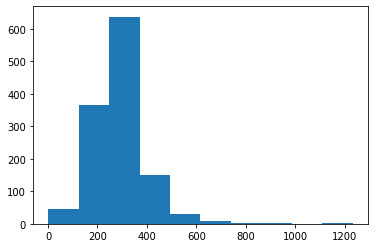

In [105]:
## examine unusually long songs
print(np.median(wdss['total_count']))
plt.hist(wdss['total_count'])
plt.show()

In [108]:
# write back to csv
wdss.to_csv('wdss.csv')